# Ejemplo de juguete

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

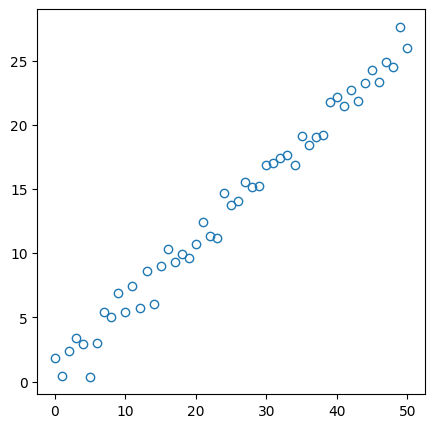

In [4]:
np.random.seed(234)

N = 50
beta_0 = 1
beta_1 = 0.5

x = np.arange(start = 0, stop = N + 1, step = 1)
 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e

_ = plt.figure(num = 0, figsize = (5, 5))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()

En el caso unidimensional,
$\hat{\beta}_1$ estima a la correlación entre las dos variables:
$$\hat{\beta}_1 = \frac{\text{Cov}(x,y)}{\text{Var}(x)}$$
y
$$\hat{\beta}_0 = \bar{y}-\hat{\beta}_{1}\bar{x}.$$


In [11]:
beta_1_est = np.cov(x, y, bias = True)[0][1] / np.var(x)
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("beta_0 estimada = " + str(beta_0_est))
print("beta_1 estimada = " + str(beta_1_est))

beta_0 estimada = 0.8385362094098401
beta_1 estimada = 0.5099221954865624


Ecuaciones normales:
$$(\hat{\beta}_{0}, \hat{\beta}_{1})^{T}=(X^{T}X)^{-1}X^{T}y$$

In [7]:
x_mat = np.column_stack((np.ones(len(x)), x)) # matriz de diseño
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), 
                  np.dot(np.transpose(x_mat), y))
print(beta_mat)

[0.83853621 0.5099222 ]


Análisis de varianza

In [8]:
import statsmodels.api as sm

x_mat = sm.add_constant(x)  
lm_model = sm.OLS(y, x_mat) 
lm_fit = lm_model.fit()     
print(lm_fit.params)        

[0.83853621 0.5099222 ]


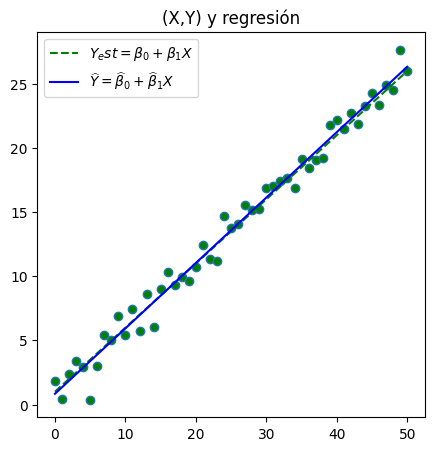

In [12]:

y_dgp = beta_0 + beta_1 * x
 
y_fit = beta_mat[0] + beta_mat[1] * x

_ = plt.figure(num = 0, figsize = (5, 5))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'green')
_ = plt.title("(X,Y) y regresión")

_ = plt.plot(x, y_dgp, linestyle = "--", color = "green", 
              label='$Y_est = \\beta_0 + \\beta_1 X$')

_ = plt.plot(x, y_fit, linestyle = "-", color = "blue",
              label='$\widehat{Y} = \widehat{\\beta}_0 + \widehat{\\beta}_1 X$')
_ = plt.legend()
plt.show()

# Ejemplo con datos reales: Conjunto de datos tomado de https://www.kaggle.com/datasets/farhanmd29/50-startups

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
X = dataset.drop('Profit', axis=1)
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [ ]:
y = dataset['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

### Codificación de datos categóricos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_feature = ["State"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [ ]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


### Conjunto de entrenamiento y conjunto prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.25, random_state = 2509)

##  Entrenando al modelo sobre el conjunto prueba

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Score

In [ ]:
regressor.score(X_test,y_test)

0.9840064291741994

## Predicciones

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}

### Comparación

In [ ]:
pd.DataFrame(d)

,y_pred,y_test
32,98884.371543,97427.84
33,100047.235184,96778.92
47,47766.247901,42559.73
9,154976.558305,149759.96
37,91129.087779,89949.14
8,151755.926389,152211.77
23,112436.195860,108733.99
24,113375.898676,108552.04
17,130706.106786,125370.37
1,189141.730655,191792.06
